In [1]:
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

<br>
<br>

# 데이터 준비
## 서울시 CCTV 현황 csv 

In [2]:
CCTV_Seoul = pd.read_csv('./01. CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


### 열 이름 수정하기

In [3]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


<br>

## 서울시 인구수 현황 excel 

In [4]:
pop_Seoul = pd.read_excel('./01. population_in_Seoul.xls',
                          header = 2,
                          usecols = 'B, D, G, J, N'
                         )
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


### 열 이름 수정하기 

In [5]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                         pop_Seoul.columns[1] : '인구수',
                         pop_Seoul.columns[2] : '한국인',
                         pop_Seoul.columns[3] : '외국인',
                         pop_Seoul.columns[4] : '고령자'}, inplace=True
                )
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


<br>
<br>

# 필요한 데이터 구하기
## 서울시 CCTV 증가율 구하기
> 최근 3 년간의 CCTV 수를 토대로 증가율을 계산합니다.

In [6]:
CCTV_Seoul['최근 증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by = '최근 증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


## 서울시 외국인 비율과 고령자 비율 구하기

In [7]:
pop_Seoul['외국인 비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자 비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689


<br>
<br>

# 데이터 분석하기
## 데이터 합치기

In [8]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')

# 필요없는 열 제거
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

# 인덱스 제거
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


<br>

## 상관계수 구하기
> 무슨 데이터와 CCTV 의 데이터를 비교해야 하는지 결정하기 위해 상관계수를 구합니다. 상관계수의 절댓값이 0.1 이하면 거의 무시, 0.3 이하면 약한 상관관계, 0.7 이하면 뚜렷한 상관관계를 가집니다.

In [9]:
# 고령자 비율의 상관계수 구하기
np.corrcoef(data_result['고령자 비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [10]:
# 외국인 비율의 상관계수 구하기
np.corrcoef(data_result['외국인 비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [11]:
# 인구수의 상관계수 구하기
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [ ]:
### 결론
상관계수를 구한 결과 인구수의 상관계수의 절댓값이 제일 크므로, CCTV 개수와 인구수의 관계를 살펴볼 필요가 있습니다.
인구수와 소계의 상관관계 계산 결과, 해당 결과의 절댓값이 0.3 이므로 약한 상관관계를 가진다고 할 수 있습니다.

<br>
<br>

# 데이터 시각화 하기
## CCTV 현황 시각화 하기

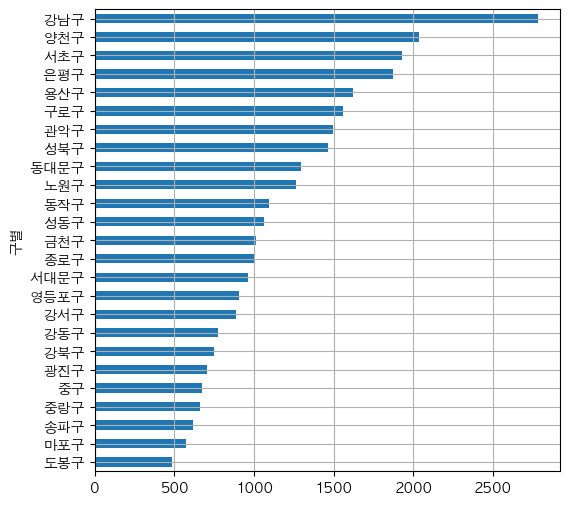

In [12]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(6,6))

plt.show()

<br>

## 인구대비 CCTV 비율 구하기
### 막대 그래프

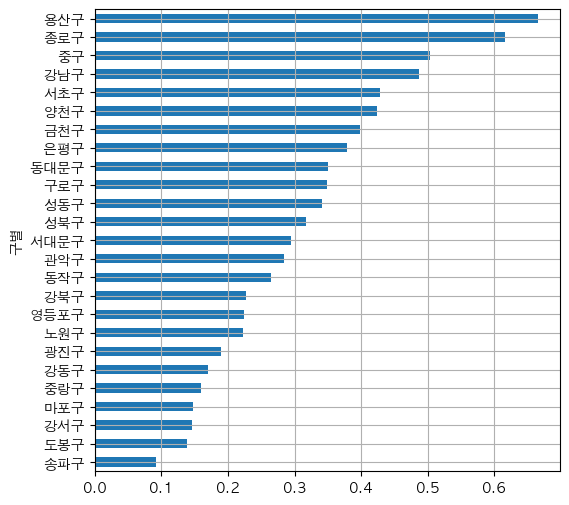

In [13]:
data_result['CCTV 비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV 비율'].sort_values().plot(kind='barh', grid=True, figsize=(6,6))

plt.show()

### 분산형 그래프

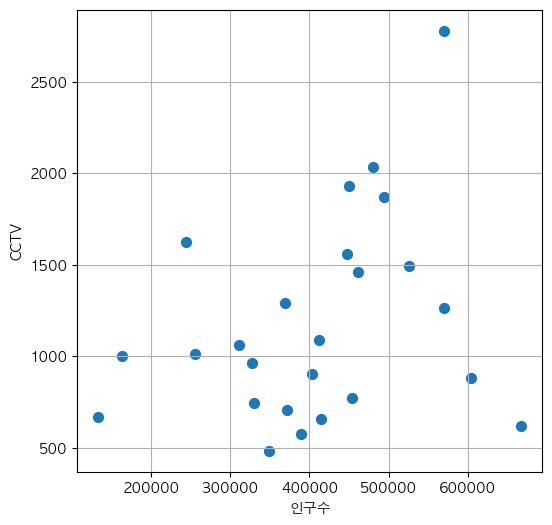

In [14]:
# 분산형 그래프 그리기
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [15]:
# 데이터를 대표하는 직선 구하기
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

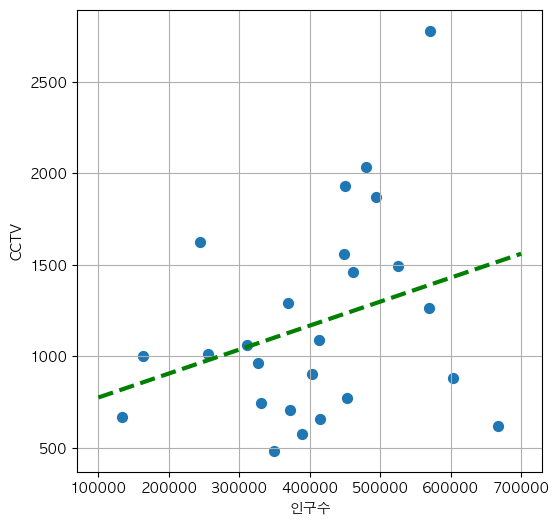

In [16]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

# 직선 그리기
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

#### 직선의 의미
이 그래프에서 직선은 인구수 당 있어야 하는 CCTV 의 수를 말합니다. 즉, 인구수가 300000 일 때, 대략 10000 개의 CCTV 를 가지고 있어야 합니다. 

In [17]:
# 오차를 계산하여 경향과 벗어나는 수준을 색으로 시각화 하기
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


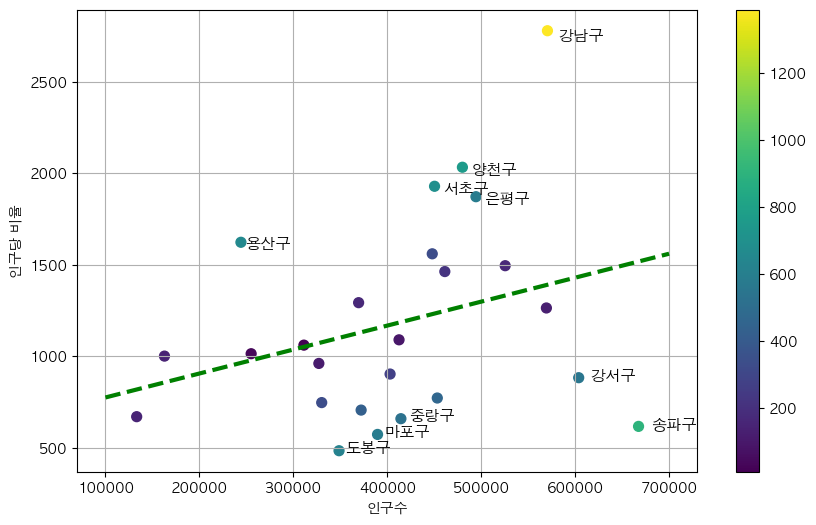

In [18]:
# 텍스트와 color map 입히기

def plot_data(data_result, df_sort, fx, f1):
    plt.figure(figsize=(10,6))
    plt.scatter(data_result['인구수'], data_result['소계'],
                c=data_result['오차'], 
                s=50
               )

    plt.plot(fx, f1(fx),
            ls='dashed',
            lw=3,
            color='g'
            )

    for n in range(10):
        plt.text(df_sort['인구수'][n]*1.02, 
                 df_sort['소계'][n]*0.98,
                 df_sort.index[n], 
                 fontsize=11
                )

    plt.xlabel('인구수')
    plt.ylabel('인구당 비율')

    plt.colorbar()
    plt.grid()
    plt.show()
    
plot_data(data_result, df_sort, fx, f1)

<br>
<br>

# 데이터 해석하기

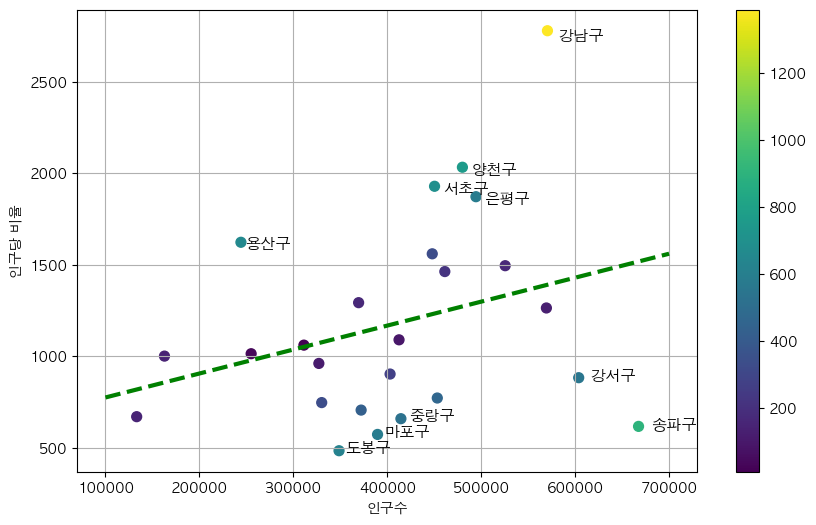

In [19]:
plot_data(data_result, df_sort, fx, f1)

- 직선을 기준으로 위에 있는 `강남구`, `양천구`, `서초구`, `은평구`, `용산구` 는 서울시 전체 지역의 일반적인 경향보다 CCTV 가 많이 설치된 지역 입니다. 
- 반면 `송파구`, `강서구`, `중랑구`, `마포구`, `도봉구` 는 일반적인 경향보다 적게 설치된 지역 입니다. 
- 특히 `송파구` 의 경우 인구수에 비해 너무 적은 수의 CCTV 를 가지고 있습니다.